# Graph Neural Network Project (** Difficulty)
### Yekaterina Drozd D3S

 #### Overview
This project is designed to explore **Graph Neural Networks (GNNs)**, a specialized type of neural network that directly operates on graph structures. I will focus on understanding graph theory fundamentals, GNN mechanics, graph convolutions, and graph pooling.

The project will involve applying a GNN to the ZINC dataset using PyTorch Geometric.

 #### Objectives
 #### Understanding Graph Theory and GNNs:
 - Explain the concept of a graph in mathematical terms, including nodes and edges.
 - Introduce Graph Neural Networks, detailing how they differ from traditional neural
 networks and their specific applications.

 #### Graph Convolution and Pooling:
 - Explain graph convolution how it extends the idea of convolution from images to graphs.
 - Detail graph pooling and its role in reducing graph size while maintaining essential
 features.

 #### PyTorch Geometric Implementation:
 - Utilize PyTorch Geometric to create and train a GNN on the ZINC dataset.
 - Focus on designing network architectures suitable for chemical compound property
 prediction, which is the primary application of the ZINC dataset.

 #### Performance Evaluation:
 - Evaluate the GNN model based on its predictive accuracy.
   
 #### Advanced Exploration (Optional):
 - Implement a graph transformer model from scratch, as described in the provided
 research paper.
 - Compare its performance and characteristics with the standard GNN model.
 Expected Deliverables

 #### Code Implementations:
 - Python code for the GNN model using PyTorch Geometric and the ZINC dataset.
 - Optional implementation of a graph transformer model.
   
 #### Technical Reports:
 - A detailed explanation of graph theory, GNNs, graph convolution, and pooling.
 - Reports on model performance, including accuracy and computational efficiency.

 #### Documentation:
 - README.md: A summary document outlining the project’s objectives, methods, and key
 results.
 - A comprehensive report detailing the theoretical background, practical implementation,
 and analysis of the results.


 #### Resources and References
 Graph Transformer Paper:
 https://proceedings.neurips.cc/paper_files/paper/2019/file/9d63484abb477c97640154d4
 0595a3bb-Paper.pdf
 ZINC Dataset Documentation:
 https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.Z
 INC.html
 PyTorch Geometric GitHub: https://github.com/pyg-team/pytorch_geometric
 Tutorial on GNNs:
 https://www.datacamp.com/tutorial/comprehensive-introduction-graph-neural-networks-g
 nns-tutorial
 Review on Graph Neural Networks: https://arxiv.org/pdf/1812.08434.pdf


### 1. Understanding Graph Theory and GNN

#### What is Graph Theory?

A graph is a complex data structure used to represent objects and the relationships between them. A graph consists of a set of nodes and edges (or links). The edges connect the different nodes to each other. Edges can be directed or undirected. In a directed graph, the edges have a direction indicating the orientation of the relationship, whereas in an undirected graph, the edges have no direction. More concretely, nodes can represent users in a social network, while links correspond to friendships between users. A graph can also be seen as the structure of a molecule or a transportation network.

In the case of Graph Neural Networks (GNNs), a graph uses feature vectors (known as embeddings) to encode all the information related to the graph, such as its structure and relationships. These embeddings create a numerical representation of a graph, which can then be used to train Machine Learning algorithms. Graph neural networks are widely used in node classification and link prediction.

In a graph, there are two types of embeddings: node embeddings and edge embeddings. Node embeddings represent the properties of each node, while edge embeddings are used to model the properties of the relationships between nodes.

Graph Theory is a branch of mathematics that studies graphs. Graphs are widely used to model relationships and connections between entities across various domains, such as social networks, transportation systems, biology, and computer science.

### Key Concepts in Graph Theory

Every graph is defined by nodes and edges. Nodes, or also called as Vertices), are fundamental units in a graph, representing entities (e.g., people, places, items). Edges, or Links are connections between nodes that represent relationships or interactions.

Graphs could be either homogenous or heterogenous, directed or undirected, static or dynamic. In directed graphs, edges have a direction (e.g., a one-way street), whereas in undirected graphs, edges are bidirectional (e.g., a friendship). Homogenous graphs are those that ignore the node/edge types and treat them as if it is a standard graph with one types of nodes and edges. Usually this is a naive assumption in some GNN applications. The graph is dynamic when the input features of the graph vary with time.
![image](https://github.com/user-attachments/assets/8f80217d-2d0d-47d9-aaa6-2b3065faac22)

Graphs are versatile and can model complex, interconnected data effectively. They form the foundation for Graph Neural Networks (GNNs), a type of neural network that operates directly on graph-structured data.

There are usually two scenarios: structural scenarios and non-structural scenarios. In structural scenarios, the graph structure is explicit like in applications on molecules, physical systems, ect. In non-structural scenarios, graphs are implicit so that we have to first build the graph from the task. After we get the graph, the later design process attempts to find an optimal GNN model on this specific graph.

#### What are Graph Neural Networks (GNNs)?

GNNs are a class of deep learning models designed to handle graph-structured data. Unlike traditional neural networks, which work with regular data structures like images (grids) or text (sequences), GNNs can learn from data with arbitrary connectivity, allowing them to capture complex relationships between entities.

GNNs work by passing messages between nodes in a graph to learn representations of nodes, edges, or the entire graph structure. Each node collects information from its connected nodes (neighbors) by aggregating features. During each layer (or iteration), a node aggregates information from its neighbors, capturing local and global structural information.

After message passing, information is combined from neighboring nodes, typically using functions like summing or averaging. The aggregated information is used to update the node's representation, capturing its structure and properties.

This process is repeated over several layers, allowing information to propagate through the graph.

After a few rounds of message passing, each node's representation encodes information from its neighbors and the larger graph structure. Training GNN looks something like this:

![image](https://github.com/user-attachments/assets/b6603808-4ab8-4f22-b8b8-e7aadbf3c80a)


##### Types of GNN Models - Spatial and Spectral paradigms

Firstly, graph convolutions differ in the type of information they can use. Some convolutions utilize only the hidden representations of nodes, ignoring information on the edges. Others process information from edges of different types in various ways. Additionally, there are convolutions that use information from both edges and nodes, simultaneously updating both.

Secondly, and more importantly, graph convolutions can be divided into two families based on the mathematical paradigm in which they operate. These are the spatial and spectral approaches. Spatial convolutions are based on the message-passing paradigm, whereas spectral convolutions work with the graph Laplacian and its eigenvectors.

In practice, spectral convolutions are more commonly used and tend to show better performance in tasks involving a single large graph, where understanding the relative position of a node within the graph is critical. Examples include social network graphs or citation graphs. On the other hand, spatial convolutions perform well in tasks where identifying local substructures within the graph is crucial.

Despite the fundamental differences between these two approaches, there are active efforts to combine them into a unified paradigm.


![image](https://github.com/user-attachments/assets/d7761127-27be-4843-a62b-8e235b9a830e)

The **spatial paradigm** is based on the message-passing algorithm between the vertices of a graph.

The concept of this approach is as follows: each vertex in the graph has an internal state. At each iteration, this internal state is updated based on the internal states of its neighboring vertices. Each neighbor influences the state of the vertex, just as the vertex influences the states of its neighbors. One iteration of the message-passing approach for a single vertex can be described by the following abstract algorithm. For each vertex $v$, all triplets ($𝑥_𝑣$,$x_w$,$e_wv$) are collected. These triplets consist of the hidden representation of the current vertex $x_v$, the hidden representation of its neighbor $x_w$, and the edge type $e_wv$ connecting the current vertex and its neighbor. A trainable transformation $M$ (short for "message") is then applied to all these triplets to compute the message — the information being passed from the neighbor to the vertex.

The computed messages are aggregated into a single one, denoted as $m_v$. The aggregation can be done using any associative operation, such as element-wise minimum, maximum, or mean. Finally, the aggregated message and the current internal state of the vertex are fed into a trainable operation $U$ (short for "update"), which updates the internal state of the vertex.

The specific implementations of the $M$ and $U$ operations directly depend on the algorithm and the task it is designed to solve.


![image](https://github.com/user-attachments/assets/1fd22979-574e-4c08-96d3-cacb7069c688)

Some of the well-known algorithms based on spatial paradigm are GraphSAGE,GIN (Graph Isomorphism Network), GAT (Graph Attention Network), and many others.


The opposite of the **spatial paradigm** is the spectral paradigm. The spectral paradigm is based on analyzing the process of signal diffusion within a graph and examining matrices that describe the graph—namely, the adjacency matrix and the graph Laplacian. The graph Laplacian is defined as $L =D-A$, where $D$ is a diagonal matrix, with the $i$-th diagonal entry storing the number of edges originating from the $i$-th vertex, and $A$ is the adjacency matrix of the graph. The $(i,j)$-th element of $A$ represents the number of edges connecting vertex $i$ to vertex $j$.

The graph Laplacian has non-negative eigenvalues. The number of zero eigenvalues always matches the number of connected components in the graph. An extraordinary property of the Laplacian is that its eigenvectors corresponding to positive eigenvalues, ordered by ascending eigenvalues, describe graph cuts—divisions of the graph into two halves such that the number of edges between the two halves is minimized.

For example, the eigenvector corresponding to the smallest positive eigenvalue describes a bipartition of the graph. Positive elements of this vector indicate the vertices that should belong to the first cluster, while negative elements correspond to the vertices that should belong to the second cluster.

This property of the graph Laplacian is utilized to perform unsupervised graph clustering. The process involves the following steps:

Compute the Laplacian $L$ of the adjacency matrix $A$. Calculate $k$ eigenvectors corresponding to the smallest eigenvalues.
Form a matrix of size $Nxk$, where each row describes a vertex with $k$ features. Cluster the objects represented by this matrix (e.g., using the K-Means algorithm).
Thus, the spectral approach is particularly suited for identifying components within a graph where vertices are densely connected and share similar properties.


![image](https://github.com/user-attachments/assets/45af220d-6768-4d55-8086-d7e7c68b98b4)

In the spectral paradigm, graph convolutions are typically defined in terms of the graph Laplacian and its eigenvectors. Thus, Graph Convolutional Networks (GCNs) are inspired by spectral approach.


Let's have a closer look on some of the GNN types.
Graph Transformer Networks (GTNs) generate new graph structures which involve identifying useful connections between unconnected nodes on the original graph, while learning effective node representation on the new graphs in an end-to-end fashion. Graph Attention Networks (GATs) use attention mechanisms to weigh the importance of neighboring nodes.

Graph Convolutional Networks (GCNs) extend convolutional neural networks to graphs by using spectral methods to define convolutions on graphs. GCN uses only  the hidden states of nodes $h$ and the adjacency matrix $A$. It considers only the presence or absence of edges in the graph, without incorporating edge features.

From a mathematical perspective, GCN is quite simple. It represents one step of an iterative process for finding the eigenvalues of the graph Laplacian: we take the hidden representations of nodes and multiply them by the normalized adjacency matrix — the matrix $A$
A is pre- and post-multiplied by the square root of the degree matrix $D$. This step is applied to all channels of the node's hidden representation. After this step, the updated hidden representations are further multiplied by a learnable weight matrix $\Theta$:

$$
h^{(t+1)} = \Theta D^{-1/2} (A + I) D^{-1/2} h^{(t)}
$$

Here, \(h^{(j)}\) is a matrix of size \((\text{number of nodes}) \times (\text{representation vector length})\), meaning the convolution is applied separately to each "channel" of the representations.

If we want to work with multiple channels, i.e., instead of \(h^{(t)}\) we have a matrix \(H^{(t)}\) of size \((\text{number of nodes}) \times (\text{number of channels})\), and if we add a nonlinearity \(f\), the formula becomes:

$$
H^{(t+1)} = f(D^{-1/2} (A + I) D^{-1/2} H^{(t)} \Theta)
$$

Graph Attention Networks (GAT) build upon the idea of GraphSAGE. Instead of a simple aggregation mechanism, GAT introduces the attention mechanism, where the transformation matrices for keys, values, and queries are the same and denoted by the matrix $W$. Like in GraphSAGE, the aggregated message is passed through a sigmoid activation function but is not multiplied by a learnable matrix beforehand.

The attention coefficients $\alpha_{v*}$ and the updated node representation $h_v^{t+1}$ are computed as follows:

$$
\alpha_{v*} = \text{softmax}\left(\text{act}\left(a^T \text{CONCAT}(W h_v^t, W h_*^t)\right)\right)
$$

$$
h_v^{t+1} = \sigma\left(\sum_{w \in N(v)} \alpha_{vw} W h_w^t\right)
$$

Here:
- $\text{act}$ is an activation function.
- $v$ is the node for which the representation is being updated.
- $w$ represents all the neighboring nodes of $v$ ($N(v)$).
- $\alpha_{vw}$ are the attention weights indicating how important the information from node $w$ is for node $v$.

Similar to attention mechanisms used for sequences, the attention mechanism in GAT "looks" at all other nodes $w$ during the update for node $v$, generating weights $\alpha_{vw}$ that determine which nodes are more important.

Due to the power and flexibility of the attention mechanism, GAT has shown excellent performance across various tasks and has become one of the most popular convolution methods. By default, GAT, like GraphSAGE, uses only node features. However, in some applications, modified versions of GAT incorporate edge information into the attention mechanism.

##### Applications of GNNs

Graphs are used as denotation of a large number of systems across various areas including social science, protein-protein interaction networks, and many other research areas. GNNs are useful in any domain that involves graph-structured data. For example, modeling relationships, predicting molecular properties, modeling physics systems, classifying diseases, detecting patterns in transportation system, etc.

For example, a citation network where types of nodes could be authors, conferences, papers, and edges are defined by their relations.

![image](https://github.com/user-attachments/assets/3148635a-b711-49af-aad1-61052e82687f)

#### 3. Advantages and Limitations of GNNs

The representation learnt by GNNs has been proven to be effective in achieving state-of the-art performance in a variety of graph datasets. GNNs can model complex, relational data beyond grid or sequence structures andcaptures both local and global patterns by iterating over multiple layers.

However, one of the limitations of GNNs is that they assume the graph structure to operate GNNs on is fixed and homogeneous. When this assumption is violated, for example in a case of a noisy graph with missing and spurious connections, GNN results in ineffective convolution with wrong neighbors on the graph. Moreover, GNNs are very computationally complex.

### Explain the concept of a graph in mathematical terms, including nodes and edges.

In mathematical terms, a graph $G$ is defined as an ordered pair $G = (V, E)$, where:

-   $V$ (or sometimes $N$) is a set of vertices (or nodes), and each element $v \in V$ represents a distinct point in the graph.

-   $|E| = N^e$ , number of edges , $E$ is a set of edges, where each edge $e \in E$ represents a connection or relationship between two vertices. Each edge $e$ can be represented as a pair $(u, v)$ of vertices, meaning an edge exists between nodes $u$ and $v$.

    As was outliened previously, graphs can be directed or undirected. In an undirected graph, edges do not have a direction, meaning $(u, v)$ and $(v, u)$ represent the same edge. The edges are unordered pairs, so the connections are bidirectional. In a directed graph, each edge has a direction, so $(u, v)$ and $(v, u)$ are considered different edges. In this case, the edges are ordered pairs, and the graph captures asymmetric relationships.

For a simple undirected graph ( G = (V, E) ), let:

-   ( V = {A, B, C, D} )
-   ( E = {(A, B), (A, C), (B, D), (C, D)} )

Here, we have a graph with four nodes ( A, B, C, ) and ( D ), and four undirected edges connecting these nodes.

#### How GNNs Differ from Traditional Neural Networks

Of course the most striking difference between GNNs and other Neural Networks is their data structure and the way the information is propagated. Traditional neural networks like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) are optimized for regular, structured data—2D grids for images or 1D sequences for text. GNNs, however, are designed to handle arbitrary graphs, where each data point may have a different number of neighbors and an irregular structure. In traditional networks, neurons are connected in a fixed pattern. In GNNs, the network architecture is flexible, allowing information to propagate based on the connections defined in the graph. During each layer (or step), a node aggregates information from its neighbors, which allows GNNs to capture both local and global relationships within the graph.

Compared to other neural networks, GNNs are particularly useful for capturing relational information, as they use edges in graphs to represent connections between entities. This makes them ideal for problems where relationships or interactions between entities are critical.

#### Graph Convolution and Pooling

Graph Convolution is an extension of the convolution operation used in one of the types of GNNs, Convolutional Neural Networks (CNNs), for images, adapted to work on graph-structured data. In image convolution, a filter moves over the grid (pixels) to extract local features. For graphs, where there is no fixed grid, graph convolution instead aggregates information from a node’s neighbors to capture local features based on the graph structure.

##### How Graph Convolution Works

In a graph convolution layer, as in a classical GNN first each node aggregates feature information from its neighbors. For a node ( v ), the features of its neighboring nodes are combined using functions like mean, sum, or weighted sum.

Then the aggregated information is then transformed by a learnable weight matrix to update the node's features. A non-linear function (e.g., ReLU) is applied to introduce complexity to the learned representation.

The operation for updating each node’s feature can be expressed as: $$
h_v^{(k+1)} = \sigma \left( W^{(k)} \cdot \sum_{u \in \mathcal{N}(v)} \frac{1}{c_{vu}} \cdot h_u^{(k)} \right)
$$ where: - $h_v^{(k+1)}$ is the feature of node $v$ in layer $k+1$, - $W^{(k)}$is a learnable weight matrix for layer $k$, - $\mathcal{N}(v)$ denotes the neighbors of node $v$, - $c_{vu}$ is a normalization constant (e.g., based on the degree of nodes), - $\sigma$ is a non-linear activation function. n.

This operation enables graph convolutional networks (GCNs) to capture structural information as well as node features in a manner that is invariant to the graph's layout.

#### Graph Pooling

Graph Pooling is a technique used in Graph Neural Networks (GNNs) to reduce the size of the graph by combining or removing certain nodes, alike to pooling in CNNs, which reduces the spatial dimensions of images. Graph pooling helps to downsample a graph’s structure while retaining its essential features, allowing the model to capture hierarchical information and reduce computational complexity.

##### Types of Graph Pooling

The pooling technique may be either global, which means that it aggregates features across all nodes to produce a single vector representing the entire graph. Or pooling could be hierarchical, meaning that it reduces the numberof nodes at intermideate layers, creating a hierarchial representation of the graph.

Global pooling is usually used when working with graph-level task. For example when classifying an entire molecule. Whereas, when the objective is to learn the most informative nodes and edges, hierarchical pooling is very helpful.

##### Why Graph Pooling is Important

This pooling technique is indeed very recommended. Pooling reduces the number of nodes, which helps control the model’s complexity and improves computational efficiency. Also pooling introduces a way to capture both local and global structures, allowing GNNs to learn from graphs with hierarchical or multi-scale patterns.
![image](https://github.com/user-attachments/assets/a9537ed1-5a4f-44ea-9f1e-e9302f270858)

DiffPool is a popular hierarchical pooling method where each node is assigned to a cluster in a differentiable manner. In DiffPool: 1. A soft cluster assignment matrix is learned, mapping nodes to clusters. 2. Node embeddings are aggregated within each cluster, creating a new graph with fewer nodes at each pooling layer.

By pooling nodes into clusters, DiffPool can capture graph structures at multiple scales, improving performance on tasks that benefit from hierarchical representations.

##### Summary

Graph convolution extends the idea of convolution to irregular graph structures, allowing GNNs to leverage the relationships between nodes. Graph pooling, by reducing graph size while preserving core structure, enhances the model’s efficiency and enables hierarchical learning, crucial for understanding complex graphs.


#### PyTorch Geometric Implementation:

In this part of the project, I am going to explain, as I understand the GNN implementation. I am going to implement the PyTorch Geometric which is a specialized extension of PyTorch designed for the development and implementation of Graph Neural Networks (GNNs).
The goal of this part is to create and train a GNN on the ZINC dataset.
**ZINC dataset** contain around 250,000 molecular graphs with up to 38 heavy atoms, where atoms are nodes and bonds are edges.
Goal is to predict properties such as solubility or drug-likeness based on those graph representations.


Let's start by importing all packages and loading the data.

In [1]:
import torch

#If you are in collab install this
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install torch-geometric
from torch_geometric.datasets import  ZINC
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn as nn

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 25.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 63.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.8 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-3x2kn8s0
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-3x2kn8s0
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit ab2b458f0c0f72d3cb573350b324db563066a7ee
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.7.0-py3-none-any.whl size=116

In [2]:

import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import ZINC
from statistics import mean


In [3]:
device = "GPU" if torch.cuda.is_available() else "CPU"
print(f"You're using the {device}!")

You're using the GPU!


In [4]:
# Load ZINC Dataset - PyTorch Geometric in-built dataset
zinc_data = ZINC(root = '/zinc_data')

print(zinc_data)
print('------------')
print(f'Number of graphs: {len(zinc_data)}')
print(f'Number of features: {zinc_data.num_features}')
print(f'Number of node features: {zinc_data.num_node_features}')
print(f'Number of classes: {zinc_data.num_classes}')

Extracting /zinc_data/molecules.zip
Processing...
Processing test dataset: 100%|██████████| 5000/5000 [00:00<00:00, 10089.71it/s]
Done!


ZINC(220011)
------------
Number of graphs: 220011
Number of features: 1
Number of node features: 1
Number of classes: 218362


/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


ZINC dataset contains 220,011 individual graphs, each node in the graphs has 1 feature associated with it, and there are 218,362 possible output classes.

In [5]:
# details about the first graph
print(f'First Graph: {zinc_data[0]}')

First Graph: Data(x=[33, 1], edge_index=[2, 72], edge_attr=[72], y=[1])


Let's have a look on the first graogh out of 220011 and its structure:
- x=[33, 1] — A node feature matrix with the shape (number of nodes, number of features). In this case, it means there are 33 nodes, and each node is associated with a 1-dimensional feature vector.
- edge_index=[2, 72] — Represents the connectivity of the graph (how nodes are connected) with the shape (2, number of directed edges).
- y=[1] — The ground truth labels for the nodes. In this task, each node is assigned to a single class (group), so we have one label per node.

In [6]:
first_graph = zinc_data[0]

print(f'x = {first_graph.x.shape}')
print(first_graph.x)

x = torch.Size([33, 1])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [2],
        [2],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [2],
        [0],
        [5]])


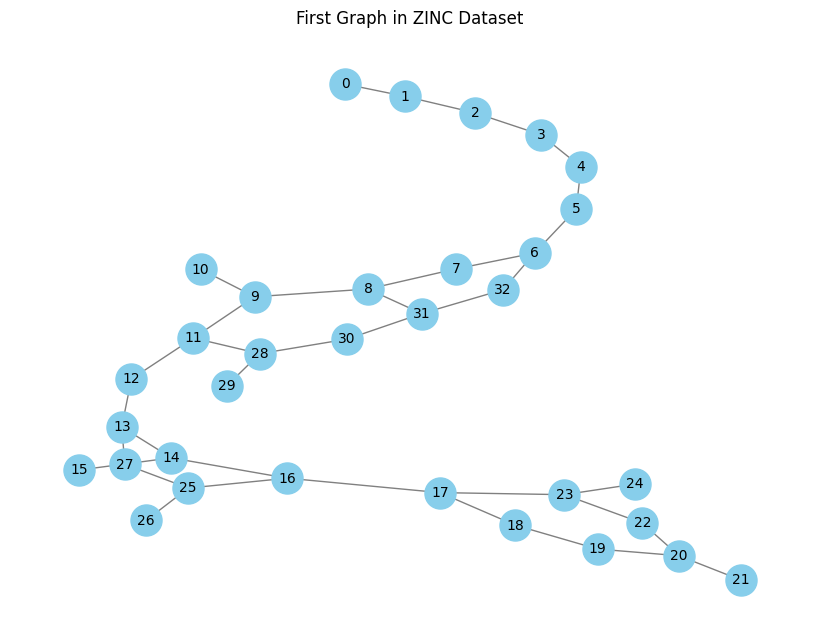

In [7]:
from torch_geometric.utils import to_networkx

G = to_networkx(first_graph, to_undirected=True)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, edge_color='gray')
plt.title("First Graph in ZINC Dataset")
plt.show()

All the graphs in the ZINC dataset are homogenous.

This plot shows 33 nodes(from 0 to 32) and 72 edges. Now, let's move on to the representation of the graph convolutional network architecture.

PyTorch Geometric provides the GCNConv function, which directly implements a graph convolutional layer.
In this example, I will create a basic graph convolutional network with one GCN layer, a ReLU activation function, and a linear output layer.

In the next code block, I define a GCN layer with a three-dimensional hidden layer.

In [8]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, input_features, hidden_dim, output_classes):
        super().__init__()
        self.gcn = GCNConv(input_features, hidden_dim)         # Graph convolutional layer
        self.out = Linear(hidden_dim, output_classes)        # Fully connected layer for output

    def forward(self, x, edge_index, batch):
        h = self.gcn(x, edge_index).relu()          # Node-level embeddings
        h = global_mean_pool(h, batch)             # Aggregate to graph-level embeddings
        z = self.out(h)                            # Graph-level predictions
        return h, z


# Initialize model
input_features = 1  # only one feature per node
hidden_dim = 3  # Number of hidden units
output_classes = 218362  #  number of classes

model = GCN(input_features, hidden_dim, output_classes)
print(model)

GCN(
  (gcn): GCNConv(1, 3)
  (out): Linear(in_features=3, out_features=218362, bias=True)
)


Now that we have defined the GNN, let's write a simple training loop using PyTorch. I chose a standard cross-entropy loss function for a multi-class classification task, with Adam as the optimizer.

The training loop is straightforward: we attempt to predict the correct labels and compare the GCN's outputs to the values stored in data.y. The error is calculated using the cross-entropy loss and propagated backward via Adam to fine-tune the weights and biases of the GNN. We print metrics every 10 epochs. Before some preprocessing is needed. Node features should be float, and labels should be type long.

In [9]:
# Preprocessing
data = first_graph
data.x = data.x.float()
data.y = data.y.long()

In [10]:
from torch_geometric.nn import GCNConv, global_mean_pool
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# Accuracy calculation
def accuracy(pred_y, y):
    return (pred_y == y).float().mean()

# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []


# Training loop
for epoch in range(201):
    optimizer.zero_grad()     # Clear gradients
    h, z = model(data.x, data.edge_index, data.batch)      # Forward pass
    loss = criterion(z, data.y)      # Calculate loss function
    acc = accuracy(z.argmax(dim=1), data.y)      # Calculate accuracy
    loss.backward()        # Compute gradients
    optimizer.step()          # Adjust parameters

    # Store data for animations
    embeddings.append(h)
    losses.append(loss.item())
    accuracies.append(acc.item())
    outputs.append(z.argmax(dim=1))

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 12.11 | Acc: 0.00%
Epoch  10 | Loss: 11.08 | Acc: 100.00%
Epoch  20 | Loss: 9.29 | Acc: 100.00%
Epoch  30 | Loss: 6.45 | Acc: 100.00%
Epoch  40 | Loss: 2.40 | Acc: 100.00%
Epoch  50 | Loss: 0.07 | Acc: 100.00%
Epoch  60 | Loss: 0.00 | Acc: 100.00%
Epoch  70 | Loss: 0.00 | Acc: 100.00%
Epoch  80 | Loss: 0.00 | Acc: 100.00%
Epoch  90 | Loss: 0.00 | Acc: 100.00%
Epoch 100 | Loss: 0.00 | Acc: 100.00%
Epoch 110 | Loss: 0.00 | Acc: 100.00%
Epoch 120 | Loss: 0.00 | Acc: 100.00%
Epoch 130 | Loss: 0.00 | Acc: 100.00%
Epoch 140 | Loss: 0.00 | Acc: 100.00%
Epoch 150 | Loss: 0.00 | Acc: 100.00%
Epoch 160 | Loss: 0.00 | Acc: 100.00%
Epoch 170 | Loss: 0.00 | Acc: 100.00%
Epoch 180 | Loss: 0.00 | Acc: 100.00%
Epoch 190 | Loss: 0.00 | Acc: 100.00%
Epoch 200 | Loss: 0.00 | Acc: 100.00%


In [11]:
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([1, 3])
tensor([[2.1917, 2.2190, 1.9736]], grad_fn=<MeanBackward1>)


By aggregating features obtained from neighboring nodes, the GNN learns a vector representation (or embedding) for each node in the network. In this model, the final layer learns to use these representations to make optimal classifications. The output represents **Graph-level Embedding**. After applying the GCN layer and global mean pooling, we are left with a 3-dimensional vector that represents the entire graph in the embedding space.


Now, i want to train the model on ALL graphs. We need train, validation and test dataset form ZINC data.

All 220011 graphs are homogenous, with 218362 potential outputs, this is a graph -level, graph regression task.

In [12]:
root = 'data/ZINC'

# We upload train, validation and test sets
train_dataset = ZINC(root, subset=False, split='train')
val_dataset = ZINC(root, subset=False, split='val')
test_dataset = ZINC(root, subset=False, split='test')

Extracting data/ZINC/molecules.zip
Processing...
Processing test dataset: 100%|██████████| 5000/5000 [00:00<00:00, 9615.59it/s] 
Done!


I am going to batch the graphs before inputting them into a Graph Neural Network to guarantee full GPU utilization. The length of this dimension is then equal to the number of examples grouped in a mini-batch and is typically referred to as the batch_size.

In [13]:
print(f'Number of classes train-dataset: {train_dataset.num_classes}')
print(f'Number of classes validation-dataset: {val_dataset.num_classes}')
print(f'Number of classes test-dataset: {test_dataset.num_classes}')

Number of classes train-dataset: 218362
Number of classes validation-dataset: 24422
Number of classes test-dataset: 4999


In [14]:
batch_size = 2**8
# split datasets in batches
# num_workers = 2: Number of CPU threads used for data loading (parallel data loading)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=2)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=2)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, num_workers=2)

In [15]:
data = test_dataset


unique_labels = torch.unique(data.y)
num_classes = len(unique_labels)

print("Unique labels:", unique_labels)
print("Number of classes:", num_classes)

Unique labels: tensor([-14.9603, -14.2208, -10.9707,  ...,   3.6328,   3.7589,   3.8720])
Number of classes: 4999


In [16]:
data = zinc_data
data.x = data.x.float()

unique_labels = torch.unique(data.y)
num_classes = len(unique_labels)

print("Unique labels:", unique_labels)
print("Number of classes:", num_classes)

Unique labels: tensor([-62.1384, -49.4655, -43.9977,  ...,   4.2320,   4.2971,   4.5195])
Number of classes: 218362


The GNN is based on two type of layers:

- Message passing layers: with the goal of node embedding, nodes update their representations by aggregating the messages received from their immediate neighbours.
- Readout layer - pooling: collects all node representations in a graph to form a graph representation

In [17]:

class GCN(nn.Module):
    def __init__(self, num_features, num_classes, hidden_channels_1, hidden_channels_2):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels_1)
        self.conv2 = GCNConv(hidden_channels_1, hidden_channels_1)
        self.conv3 = GCNConv(hidden_channels_1, hidden_channels_2)
        self.conv4 = GCNConv(hidden_channels_2, num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings through Message passing layers
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = self.conv3(x, edge_index)
        x = torch.relu(x)
        x = self.conv4(x, edge_index)

        # 2. Readout layer
        g_pool = global_mean_pool(x, batch)
        return g_pool

In [18]:
model = GCN(num_features = 1, num_classes = 1, hidden_channels_1 = 64, hidden_channels_2 = 64)  # num_classes should be 1 for regression tasks
model


GCN(
  (conv1): GCNConv(1, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (conv4): GCNConv(64, 1)
)

First, I want to have a look on a first example without training the GNN. That is, a forward pass without doing backward propagation. For this purpose, first  I am going to select a batch in the training set, and I will predict the solubility for each molecule in this batch:

In [19]:
# First batch of data from training dataloader
for d in train_dataloader:
    example_data = d
    break
print(example_data)

DataBatch(x=[5938, 1], edge_index=[2, 12784], edge_attr=[12784], y=[256], batch=[5938], ptr=[257])


In [20]:
for i, d in enumerate(train_dataloader):

    print(f"Batch {i+1}:")
    print(d)
    print("-" * 50)
    if i == 2:  # Stop after printing the first three batches
        break

Batch 1:
DataBatch(x=[5938, 1], edge_index=[2, 12784], edge_attr=[12784], y=[256], batch=[5938], ptr=[257])
--------------------------------------------------
Batch 2:
DataBatch(x=[5916, 1], edge_index=[2, 12742], edge_attr=[12742], y=[256], batch=[5916], ptr=[257])
--------------------------------------------------
Batch 3:
DataBatch(x=[6002, 1], edge_index=[2, 12904], edge_attr=[12904], y=[256], batch=[6002], ptr=[257])
--------------------------------------------------


This is a DataBatch object:
- x =[5938,1] is the node feature matrix, there are 5938 nodes in the batch and each node has one feature.

- edge_index = [2, 12784] representation of the graph's edges, there are 12784 edges, and each column in the matrix represents and edge with the indices of the two nodes it connects

- edge_attr = [12784], attribute vector for edges, each of the 12784 edges has one attribute

- y = 256 represents the labels for the batch, this batch contains 256 graphs, and each graph has one label

In [21]:
example_prediction = model(example_data.x.to(torch.float32), example_data.edge_index, example_data.batch)
print(example_prediction.size())

torch.Size([256, 1])


In [22]:
total_train_loss = [] # here we are going to store the mean of the training loss of all the batches for each epoch
total_val_loss = [] # here we are going to store the mean of the validation loss of all the batches for each epoch
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=1e-5)
num_epochs = 20

model.train()

for epoch in range(num_epochs):
    train_running_loss = []
    val_running_loss = []

    # Loop over the training dataset
    for data in train_dataloader:
        # Forward pass
        output = model(data.x.to(torch.float32), data.edge_index, data.batch)
        loss = loss_fn(output.squeeze(), data.y)

        # Backward pass
        optimizer.zero_grad()         # reset the optimizer gradient'
        loss.backward()               # Backward the loss
        optimizer.step()              # Apply optimizer

        # Track the running loss for the training set
        train_running_loss.append(loss.item())

    total_train_loss.append(mean(train_running_loss))

    # Loop over the validation dataset
    with torch.no_grad():
        for data in val_dataloader:
            # Forward pass
            output = model(data.x.to(torch.float32), data.edge_index, data.batch)
            loss = loss_fn(output.squeeze(), data.y)

            # Track the running loss for the validation set
            val_running_loss.append(loss.item())

    total_val_loss.append(mean(val_running_loss))

    # Print the loss for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}: Training Loss = {total_train_loss[-1]} Validation Loss = {total_val_loss[-1]}")


Epoch 1/20: Training Loss = 2.931983583611111 Validation Loss = 2.642193753272295
Epoch 2/20: Training Loss = 2.584127814270729 Validation Loss = 2.5814868149658046
Epoch 3/20: Training Loss = 2.295744970371557 Validation Loss = 2.123066335916519
Epoch 4/20: Training Loss = 2.0903520990249724 Validation Loss = 1.958157589038213
Epoch 5/20: Training Loss = 1.9740930641113326 Validation Loss = 1.9239397483567398
Epoch 6/20: Training Loss = 1.9245090330755987 Validation Loss = 1.8849565436442692
Epoch 7/20: Training Loss = 1.8955734936996949 Validation Loss = 1.8703501106550295
Epoch 8/20: Training Loss = 1.869151041258213 Validation Loss = 1.7904902920126915
Epoch 9/20: Training Loss = 1.844595338785371 Validation Loss = 1.8123605983952682
Epoch 10/20: Training Loss = 1.8232396458470543 Validation Loss = 1.8174036474277575
Epoch 11/20: Training Loss = 1.8079999789249066 Validation Loss = 1.7665490818520386
Epoch 12/20: Training Loss = 1.7967040436212407 Validation Loss = 1.78874420995513

The training loss decreases across epochs, model is learning from the data. Validation loss decreases in the beginning and stabilizes around epoch 8. In validation data it reaches its capasity for capturing patterns.

Find below the plot of the evolution of the loss for each epoch for both the training and validation sets:

In [23]:
print(data.y)

tensor([ 7.3913e-01,  5.3556e-01, -3.8451e-01, -2.0127e+00,  1.8636e+00,
         1.1678e-01,  2.0796e+00,  1.3175e+00, -2.8681e-01,  1.4838e+00,
         1.1751e+00,  1.1367e+00,  1.1141e+00,  1.5252e+00, -1.5286e+00,
         1.4211e+00, -4.0784e+00, -2.8439e+00,  4.1670e-01, -1.7211e+00,
        -5.6016e-01,  2.4076e-01, -3.8828e-01,  3.2696e-01, -8.6757e-03,
        -2.2223e+00, -1.6706e+00, -1.8463e+01,  7.8799e-01, -2.3776e+00,
        -3.3657e+00,  1.0652e+00,  5.4001e-01,  1.8203e+00,  5.8851e-01,
         2.3283e+00, -2.2060e+00,  2.7259e+00,  9.0359e-01,  6.1908e-01,
         1.4126e+00, -1.1542e+00,  3.9499e-01, -1.0688e-01, -3.2143e-01,
        -8.4239e-01,  4.2573e-01, -1.8848e+00,  5.1585e-01, -1.0031e+00,
         6.9804e-01, -3.5596e+00, -1.0794e+00,  1.5496e+00,  9.9837e-01,
        -7.9498e-01,  1.2690e+00,  1.6563e+00, -6.1259e+00, -2.4954e+00,
         8.6415e-01, -1.8426e-01,  1.6003e+00,  2.2603e+00,  7.9102e-01,
        -2.4902e+00,  1.5056e+00,  1.6787e+00,  1.0

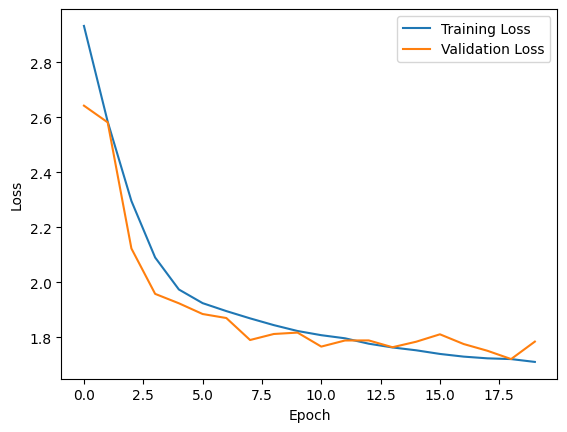

In [24]:
# Plot the running loss
plt.plot(total_train_loss, label="Training Loss")
plt.plot(total_val_loss, label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Both training loss and validation loss are steadily decreasing, the model is learning and improving its predictions on both training and validation data over each epoch.
Training and validation are quite close ti each other throughout the epochs, which signifies that the model does not overfit!!




Finally, we are going to run the GNN model trained above on the test data set

In [25]:

total_test_loss = []
test_running_loss = []
for data in test_dataloader:
    # Forward pass
    output = model(data.x.to(torch.float32), data.edge_index, data.batch)
    loss  = loss_fn(output.squeeze(), data.y)

    # Track the running loss for the validation set
    test_running_loss.append(loss.item())

total_test_loss.append(mean(test_running_loss))
total_test_loss

[1.5958267748355865]

In [26]:
test_running_loss

[1.285673975944519,
 1.1051467657089233,
 1.6663212776184082,
 1.025230884552002,
 1.0256067514419556,
 1.3496782779693604,
 2.18566632270813,
 1.475746989250183,
 1.1611732244491577,
 2.3103225231170654,
 1.1080955266952515,
 1.626777172088623,
 1.5096380710601807,
 1.6427910327911377,
 1.503344178199768,
 2.713670015335083,
 2.736581802368164,
 1.5025591850280762,
 1.697357177734375,
 1.2851543426513672]

In [27]:
print(f"Train Batch Loss: {loss.item()}")

Train Batch Loss: 1.2851543426513672


In [28]:
print(f"Model Output: {output[:5]}")
print(f"Target: {data.y[:5]}")

Model Output: tensor([[-2.6121],
        [-0.4468],
        [-0.4024],
        [ 1.3734],
        [ 0.4686]], grad_fn=<SliceBackward0>)
Target: tensor([-2.6242, -1.2378, -0.7929,  2.1951, -0.7690])


In [29]:
loss = loss_fn(output.squeeze(), data.y)
squared_diff = (output.squeeze() - data.y) ** 2
print(f"Squared differences: {squared_diff}")

Squared differences: tensor([1.4653e-04, 6.2563e-01, 1.5247e-01, 6.7520e-01, 1.5317e+00, 2.7534e+00,
        1.2836e+00, 5.6861e-02, 3.3910e-02, 2.8774e+00, 3.0819e-02, 5.5287e-01,
        1.0863e-01, 2.0465e-01, 8.7739e-02, 9.2452e-02, 3.6708e-02, 5.9132e-02,
        1.0115e+00, 5.0857e-02, 8.2942e-01, 5.1198e-01, 7.8047e-01, 2.4966e-02,
        2.8294e-02, 3.1661e-03, 1.0492e-01, 6.3834e-02, 1.7066e-01, 5.9380e-01,
        3.1992e-02, 9.6108e-02, 6.5847e+00, 4.1656e-01, 4.4521e-01, 2.7911e-01,
        1.7579e-01, 2.6280e-02, 1.1966e+00, 6.1806e-02, 1.3896e+01, 1.4866e-02,
        7.3786e-02, 8.0235e-01, 1.0091e+00, 9.3986e-02, 3.7093e-01, 6.5052e-05,
        1.8648e+00, 1.6549e-02, 3.7718e+00, 1.2860e+00, 1.0742e+00, 6.6948e-01,
        3.2957e-04, 2.7258e-01, 5.4423e-01, 6.7644e-01, 7.2223e-01, 1.0101e+00,
        1.2807e-02, 6.0622e-02, 5.3002e-01, 5.4660e-01, 4.1755e-01, 3.7655e+01,
        4.1505e+00, 1.5884e+00, 1.8394e-01, 1.5893e+00, 6.8219e-02, 3.2548e-03,
        6.4941e-02,